# Team 4 Machine Predictive Maintenance Classification

### Contributors: Elan Wilkinson, Zack Robertson, Alden Caterio, Laxmi Sulakshana Rapolu
Using the available machine production data, we will predict likely future failure and type. The data available is comprised of temperature readings, readings from and measurement data from the equipment, product quality variants, failure states, and failure types. Multiple modeling approaches will be evaluated, with a particular emphasis on leveraging ensemble methods.

## Dataset
The Predictive Maintenance Dataset encompasses 10,000 data points, each with 10 distinct features. These features include a unique identifier (UID), product ID with quality variants (L, M, H), air temperature [K], process temperature [K], rotational speed [rpm], torque [Nm], tool wear [min], and a ‘machine failure’ label indicating the occurrence of a failure. 
The dataset also includes multiple failure modes: Power Failure, Tool Wear Failure, Overstrain Failure, Random Failures, and Heat Dissipation Failure.

Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.activations import relu, sigmoid

In [72]:
machining_failure_data = pd.read_csv('predictive_maintenance.csv')

In [73]:
failure_status = machining_failure_data['Target']
failure_types = machining_failure_data['Failure Type']

id_cols = ['UDI','Product ID']

machining_failure_data = machining_failure_data.drop(id_cols, axis=1)
machining_failure_data = machining_failure_data.drop('Target', axis=1)
machining_failure_data = machining_failure_data.drop('Failure Type', axis=1)

In [44]:
#print failure_types unique vals
print(failure_types.unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


## Exploratory Data Analysis

In [8]:
print(machining_failure_data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

In [9]:
print("Missing Value Counts:")
print(machining_failure_data.isnull().sum())

Missing Value Counts:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [74]:
# Make Type Column Ordinal
machining_failure_data['Type'] = machining_failure_data['Type'].map({'L':0, 'M':1, 'H':2})

Correlation Matrix:


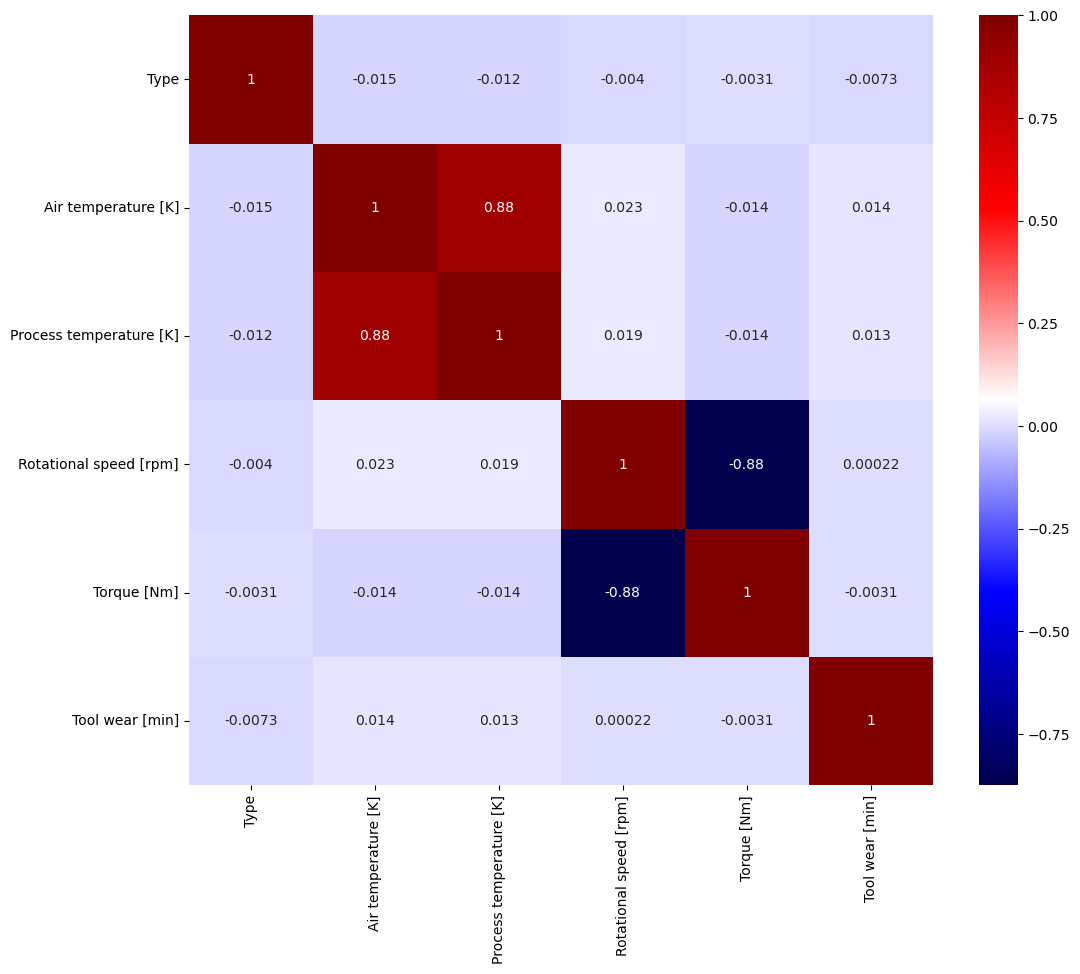

In [39]:
print("Correlation Matrix:")

plt.figure(figsize=(12,10))
cor = machining_failure_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.seismic)
plt.show()


Comparative Box Plots For Each Feature:


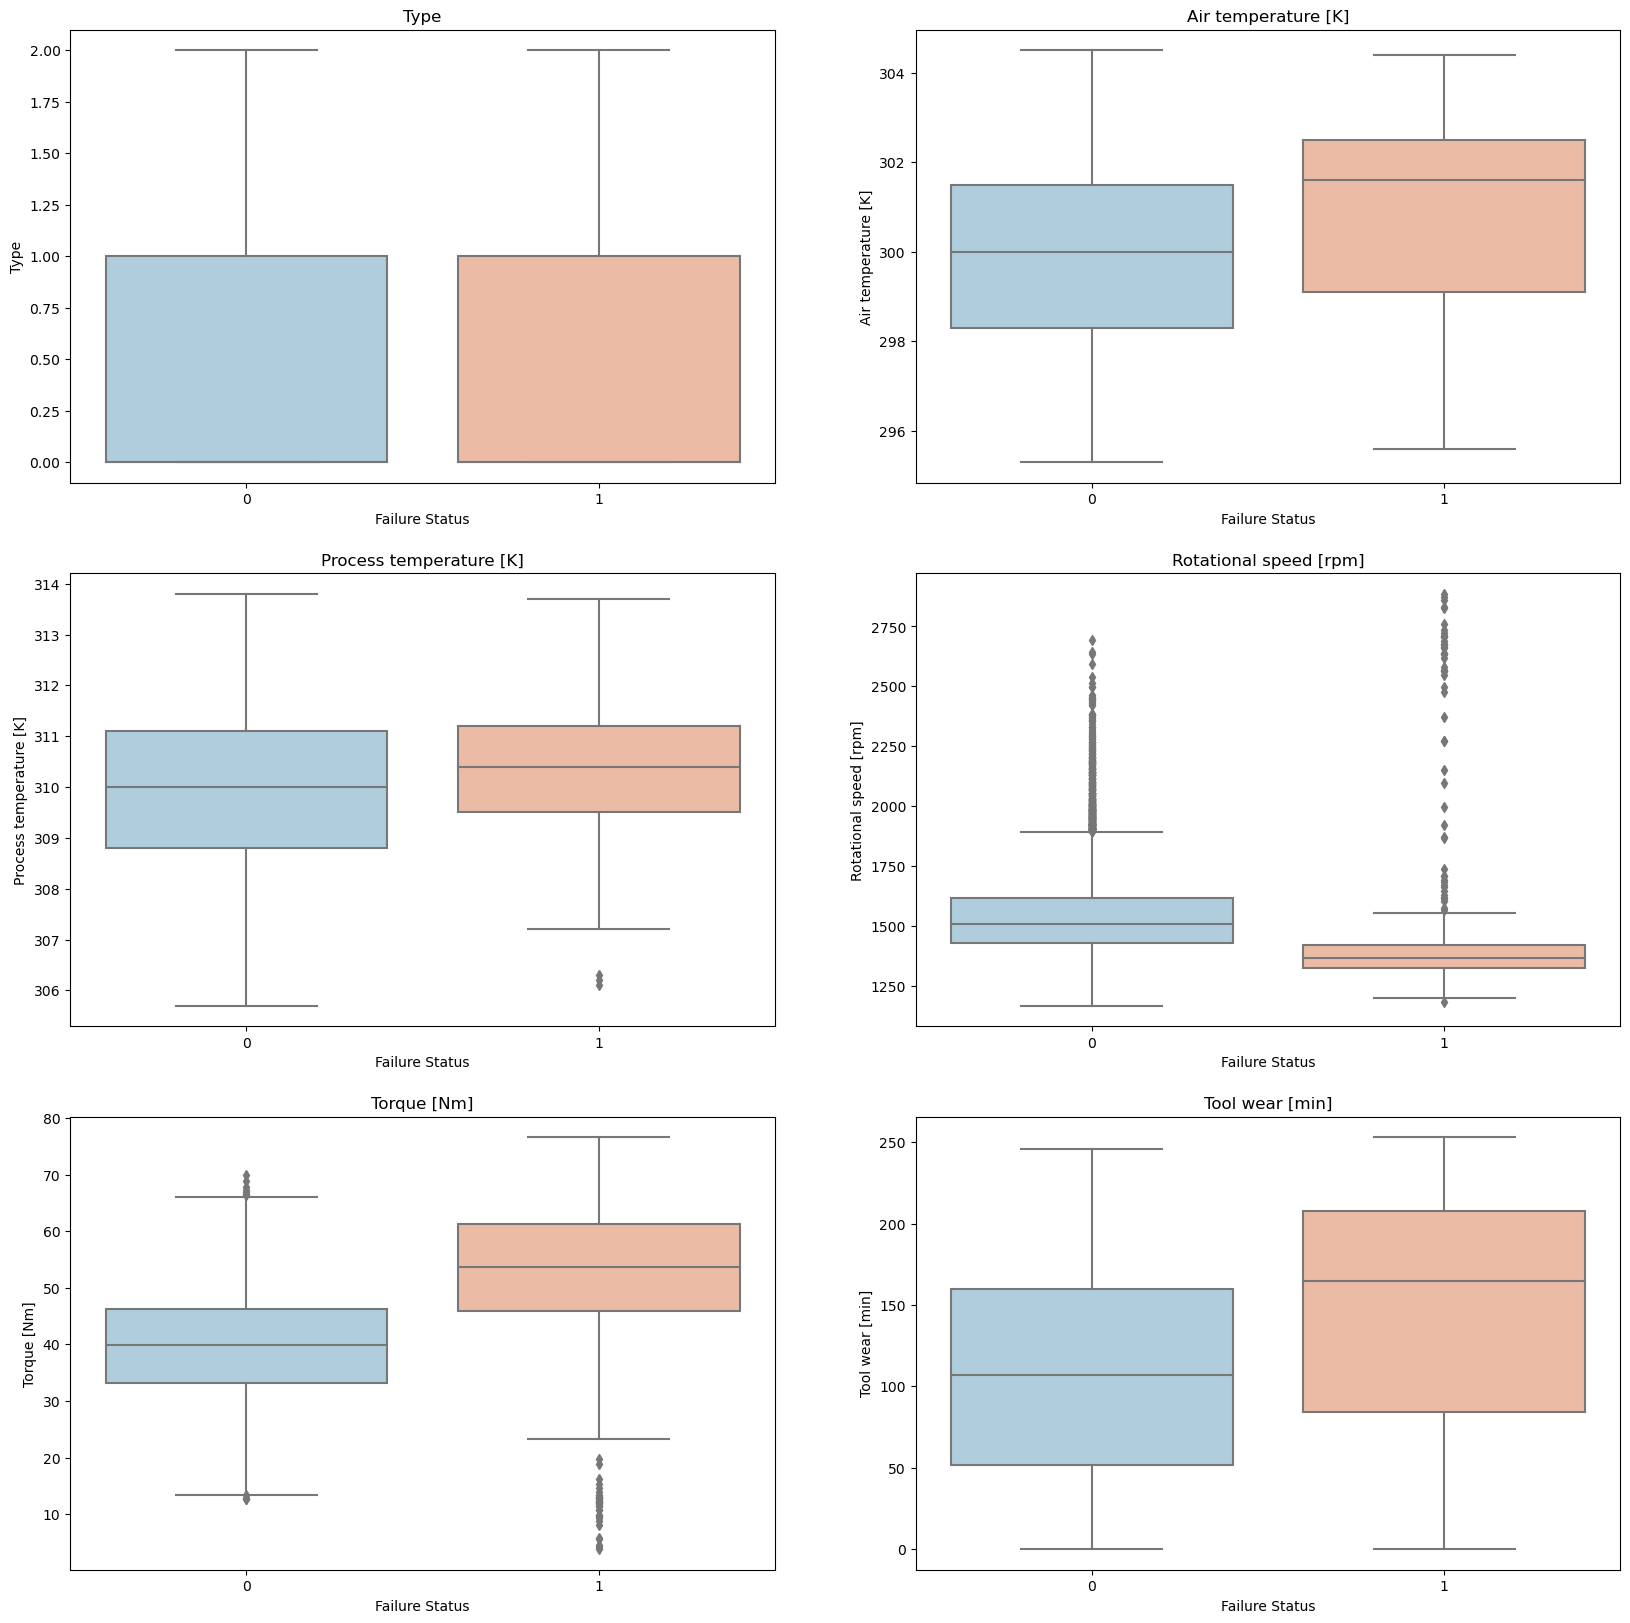

In [43]:
print("Comparative Box Plots For Each Feature:")
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(machining_failure_data.columns):
    sns.boxplot(x=failure_status, y=col, data=machining_failure_data, ax=axes[i//2, i%2], palette='RdBu_r')
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('Failure Status')


## Modeling Failure Prediction

In [81]:
#convert machining_failure_data to a numpy array
machining_failure_data_nparray = machining_failure_data.values
print(machining_failure_data_nparray.dtype)

import tensorflow as tf

# convert machining_failure_data to a tensor
machining_failure_data_tensor = tf.convert_to_tensor(machining_failure_data_nparray, dtype=tf.float32)

lstm_model = Sequential([
    Dense(32, input_dim=6),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
])

# print shape of machining failure_data_tesnor and failure_status
print(machining_failure_data_tensor.shape)
print(failure_status.shape)
lstm_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
lstm_model.fit(machining_failure_data_tensor, failure_status, epochs=10, batch_size=32)

float64
(10000, 6)
(10000,)
Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1426 - accuracy: 0.9352
Epoch 2/10
313/313 [==============================] - 0s 885us/step - loss: 0.9042 - accuracy: 0.9316
Epoch 3/10
313/313 [==============================] - 0s 906us/step - loss: 0.7451 - accuracy: 0.9294
Epoch 4/10
313/313 [==============================] - 0s 855us/step - loss: 0.7750 - accuracy: 0.9258
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.9315
Epoch 6/10
313/313 [==============================] - 0s 883us/step - loss: 0.6424 - accuracy: 0.9321
Epoch 7/10
313/313 [==============================] - 0s 818us/step - loss: 0.5821 - accuracy: 0.9360
Epoch 8/10
313/313 [==============================] - 0s 853us/step - loss: 0.5598 - accuracy: 0.9376
Epoch 9/10
313/313 [==============================] - 0s 832us/step - loss: 0.5387 - accuracy: 0.9401
Epoch 10/10
313/313 [==============================] - 0s 

### Prediction of Failure Type
